# A Word Cloud

A word cloud is a snapshot of text.

### Install the Word Cloud Library

In a Google Colab notebook we use the next script.

In [1]:
!pip install wordcloud

In a terminal we use 

```pip install wordcloud``` 
or
```conda install -c conda-forge wordcloud```


### Import the Text Material

For this example, we will use content from a Wikipedia page, which you can download as raw text in a few lines of code without the inherent markup.

In [22]:
import requests

def wikipedia_page(title):
  '''
  This function returns the raw text of a wikipedia page
  given a wikipedia page title
  '''
  params = {
      'action': 'query',
      'format': 'json', # request json formatted content
      'titles': title, #title of the wikipedia page
      'prop': 'extracts',
      'explaintext': True
  }
  headers = {"User-Agent": ""}
  # send a request to the wikipedia api
  response = requests.get(
      'https://en.wikipedia.org/w/api.php',  
      params= params, headers = headers
  ).json()

  #Parse the result
  page = next(iter(response['query']['pages'].values()))
  # return the page content
  if 'extract' in page.keys():
    return page['extract']
  else:
    return "Page not found"

# we lowercase the text to avoid having to deal with uppercase and capitalized words
text = wikipedia_page('Carbon capture and storage').lower()
print(text)

carbon capture and storage (ccs) or carbon capture and sequestration is the process of capturing carbon dioxide (co2) before it enters the atmosphere, transporting it, and storing it (carbon sequestration) for centuries or millennia. usually the co2 is captured from large point sources, such as coal-fired power plant, a chemical plant or biomass power plant, and then stored in an underground geological formation. the aim is to prevent the release of co2 from heavy industry with the intent of mitigating the effects of climate change. although co2 has been injected into geological formations for several decades for various purposes, including enhanced oil recovery, the long-term storage of co2 is a relatively new concept. carbon capture and utilization (ccu) and ccs are sometimes discussed collectively as carbon capture, utilization, and sequestration (ccus). this is because ccs is a relatively expensive process yielding a product with an intrinsic low value (i.e. co2). hence, carbon cap

## Create the Word Cloud

In [23]:
# import the wordcloud library
from wordcloud import WordCloud
#Instantiate a new wordcloud.
wordcloud = WordCloud(random_state = 8,
                      normalize_plurals = False,
                      width = 600, height=300,
                      max_words = 300,
                      stopwords = []
                       )
# Apply the wordcloud to the text.
wordcloud.generate(text)

Use ```matplotlib``` to display the word cloud as an image:

(-0.5, 599.5, 299.5, -0.5)

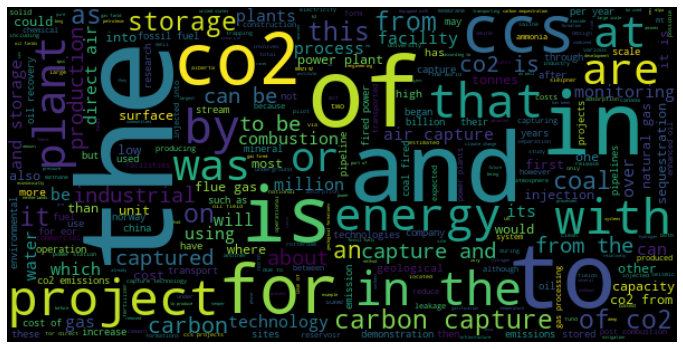

In [24]:
import matplotlib.pyplot as plt
# create a figure
fig, ax = plt.subplots(1,1, figsize = (12,9))
#add interpolation = bilinear to smooth things out
plt.imshow(wordcloud, interpolation='bilinear')
#and remove the axis
plt.axis("off")